In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import string
import nltk
from nltk.corpus import stopwords
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
filePath = os.path.join(os.getcwd(), 'data', 'yelp.csv')

In [3]:
df = pd.read_csv(filePath)
df.sample(5)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
9923,bgTB6MgdVQssXhkNJ7qIfw,2011-07-21,IcwlOBfr3lPLQ8BzhLdmIA,5,My favorite sushi restaurant ever! I love thei...,review,59pVYStY0yKpRmODFIfDww,2,2,1
6909,vwZ15OkVO6PemAe87k0M-Q,2011-08-01,j-PuuOJDnyBf2AqSMZslFA,4,"Great spot, but it get's wayyyy too packed! So...",review,fJ_sUnZfUX6aCnqOXookig,1,2,1
9421,eR5-nFI0Vp7EG2pIXQM3bw,2012-04-21,r-hzNCrugr1hG9m-zSWokA,1,Cheap! Cheap! Beware! If you order Chicken ...,review,Er4F-PTME7RsIwKainiR0Q,0,1,0
3013,HhNY3X0kyrN5682La6N6Cg,2010-10-08,4VIFaT_UzgvQ1CICcHBxWA,3,Not a big fan of the Boba Tea House by Lee Lee...,review,e9HWnHUYlt9758oileaISw,1,1,1
3534,G6EKYSP1RMbaBDlU8F72ww,2012-07-12,NgYwRhl39AsTi4FExDJMHg,4,"They do small engine repair here, so I took my...",review,d1zJj49Q5ikgvqQX0534RQ,0,0,0


In [4]:
df.shape

(10000, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [6]:
df.isna().sum()

business_id    0
date           0
review_id      0
stars          0
text           0
type           0
user_id        0
cool           0
useful         0
funny          0
dtype: int64

In [7]:
df['text_length'] = df['text'].apply(len)

In [8]:
df.sample(5)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
2655,EFFIduf9WaUNbDy_O7yQjA,2012-07-18,fQvwelk-AnTMcmkcfEkc2A,4,Great fast service! Friendly girls that carrie...,review,pGaRAiCRfGs715VbgXf-yg,0,0,0,130
3281,noLH_u4MJzfXYYHqcByjnA,2011-08-31,Ip9XDe8g2SkJlNpkEVTXbg,4,It has been awhile since I have visited the Du...,review,4E_nPWw89FLFHdNsEgMH-g,1,3,2,578
237,OFiQ34TNKEE5a00Vd8Kwsg,2008-11-03,N9lNmpiOD0bQQTDUvPAMew,2,My first visit was roughly two weeks ago when ...,review,EO5Q9yRT7LP00iQYpSNuhw,0,0,0,514
6951,QzXFdjIbFRGhzL83goPPLA,2012-06-05,IyDWAs6SXTDSrqN8dfQjFw,3,ordered the steak sandwich (medium rare). Cam...,review,4ijNZcDq3jiXF10K9lDRZg,0,1,0,212
3206,yc5AH9H71xJidA_J2mChLA,2010-01-30,NmSjR-oql5BKxoB1dZQWLw,4,I went on a Friday night after work with 3 of ...,review,_PzSNcfrCjeBxSLXRoMmgQ,1,0,0,864


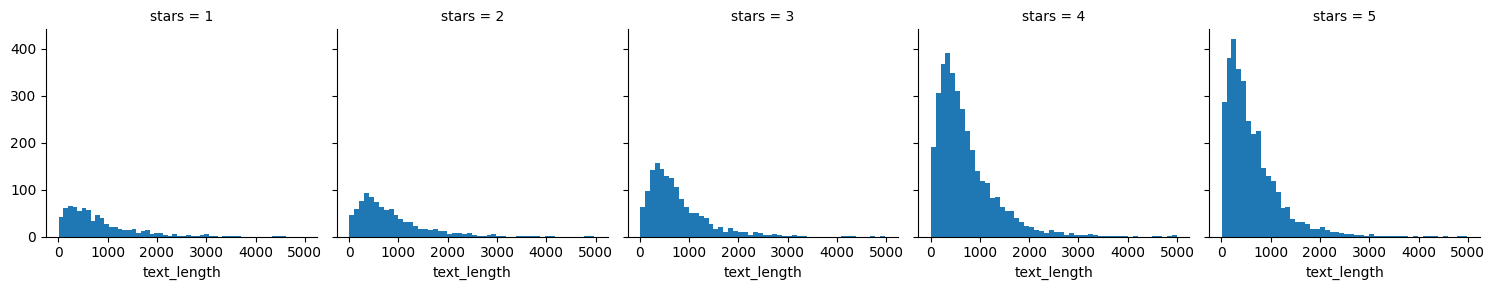

In [9]:
g = sns.FacetGrid(data=df, col='stars')
g.map(plt.hist, 'text_length', bins=50, label='Text length')
plt.show()

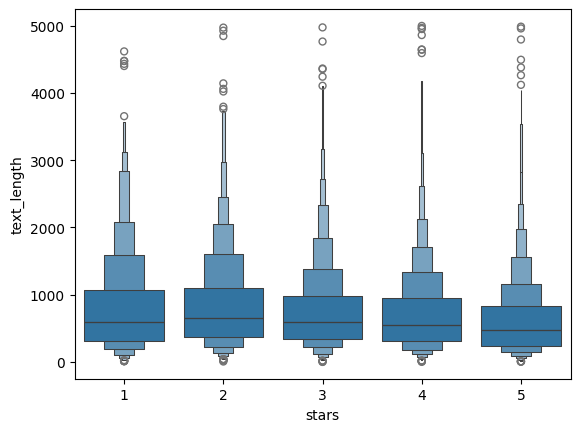

In [10]:
sns.boxenplot(data=df, x = 'stars', y='text_length')
plt.show()

<BarContainer object of 10000 artists>

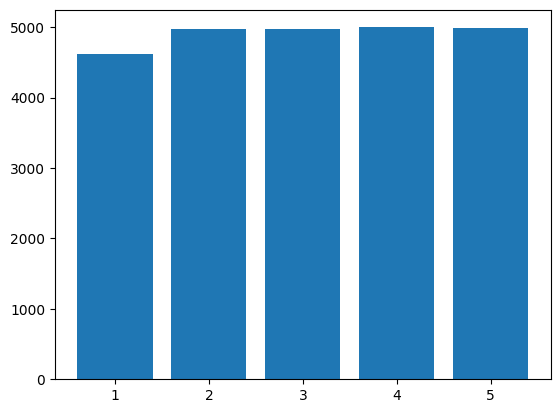

In [11]:
plt.bar(df['stars'], df['text_length'])

#### Predict Whether Cool Or Funny

In [12]:
df_class = df[(df['stars'] == 1)|(df['stars'] == 5)]

In [13]:
X = df_class['text']
y = df_class['stars']

In [14]:
X.shape, y.shape

((4086,), (4086,))

In [15]:
X[0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [16]:
def text_process(text):
    non_punc_txt = [word for word in text if word not in string.punctuation]
    non_punc_txt = ''.join(non_punc_txt)
    non_punc_txt_wd_tokonize = nltk.word_tokenize(non_punc_txt)
    non_punc_txt_wd_tokonize_no_stopwords = [w for w in non_punc_txt_wd_tokonize if w.lower() not in nltk.corpus.stopwords.words('english')]
    return non_punc_txt_wd_tokonize_no_stopwords

#### CountVectorizer 

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
count_vctorizer = CountVectorizer(analyzer=text_process).fit(X)

In [24]:
len(count_vctorizer.vocabulary_)

26430

In [25]:
review_25 = X[24]
review_25

"I love this place! I have been coming here for ages.\nMy favorites: Elsa's Chicken sandwich, any of their burgers, dragon chicken wings, china's little chicken sandwich, and the hot pepper chicken sandwich. The atmosphere is always fun and the art they display is very abstract but totally cool!"

In [28]:
print(count_vctorizer.transform([review_25]))

  (0, 2097)	1
  (0, 3004)	1
  (0, 8906)	1
  (0, 9148)	1
  (0, 9292)	1
  (0, 9613)	1
  (0, 9724)	1
  (0, 10844)	1
  (0, 11439)	3
  (0, 11488)	1
  (0, 11874)	1
  (0, 12217)	1
  (0, 13319)	1
  (0, 13516)	1
  (0, 14477)	1
  (0, 15161)	1
  (0, 16373)	1
  (0, 17806)	1
  (0, 17945)	1
  (0, 20038)	1
  (0, 20292)	1
  (0, 22071)	3
  (0, 24792)	1
  (0, 26097)	1


In [32]:
count_vctorizer.get_feature_names_out()[11439]

'chicken'

In [33]:
X = count_vctorizer.transform(X)

In [35]:
print(f'X Shape {X.shape}')
print(f'Zero Count In Vectorization {X.nnz}')

X Shape (4086, 26430)
Zero Count In Vectorization 222352


In [45]:
ZeroDenstity = 100 * X.nnz / (X.shape[0] * X.shape[1])

In [46]:
ZeroDenstity

0.20589486464768358

In [56]:
vdf = pd.DataFrame(X.toarray(), columns=count_vctorizer.get_feature_names_out())
vdf.sample(20)

,0,00s,01042012,022010,03342,05,050,06,07092008,075,...,zoo,zoom,zucchini,zuccini,zuchinni,zupa,zwiebelkräuter,École,éclairs,ém
3129,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2212,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3642,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1919,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1479,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Training data and test data


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, classification_report

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [64]:
rfClsf = RandomForestClassifier()

In [65]:
rfClsf.fit(X_train, y_train)

RandomForestClassifier()

In [66]:
preds = rfClsf.predict(X_test)

In [67]:
preds

array([5, 5, 5, ..., 5, 5, 5], dtype=int64)

In [68]:
confusion_matrix(y_test, preds)

array([[ 66, 162],
       [  5, 993]], dtype=int64)

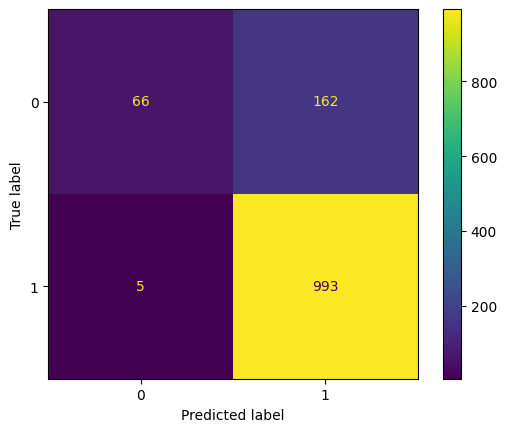

In [69]:
ConfusionMatrixDisplay(confusion_matrix(y_test, preds)).plot()

In [74]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.93      0.29      0.44       228
           5       0.86      0.99      0.92       998

    accuracy                           0.86      1226
   macro avg       0.89      0.64      0.68      1226
weighted avg       0.87      0.86      0.83      1226



In [75]:
positive_review = df_class['text'][59]
positive_review

"This restaurant is incredible, and has the best pasta carbonara and the best tiramisu I've had in my life. All the food is wonderful, though. The calamari is not fried. The bread served with dinner comes right out of the oven, and the tomatoes are the freshest I've tasted outside of my mom's own garden. This is great attention to detail.\n\nI can no longer eat at any other Italian restaurant without feeling slighted. This is the first place I want take out-of-town visitors I'm looking to impress.\n\nThe owner, Jon, is helpful, friendly, and really cares about providing a positive dining experience. He's spot on with his wine recommendations, and he organizes wine tasting events which you can find out about by joining the mailing list or Facebook page."

In [77]:
positive_review_transformed = count_vctorizer.transform([positive_review])

In [84]:
rfClsf.predict(positive_review_transformed)[0]

5

In [85]:
negative_review = df_class['text'][281]
negative_review

'Still quite poor both in service and food. maybe I made a mistake and ordered Sichuan Gong Bao ji ding for what seemed like people from canton district. Unfortunately to get the good service U have to speak Mandarin/Cantonese. I do speak a smattering but try not to use it as I never feel confident about the intonation. \n\nThe dish came out with zichini and bell peppers (what!??)  Where is the peanuts the dried fried red peppers and the large pieces of scallion. On pointing this out all I got was " Oh you like peanuts.. ok I will put some on" and she then proceeded to get some peanuts and sprinkle it on the chicken.\n\nWell at that point I was happy that atleast the chicken pieces were present else she would probably end up sprinkling raw chicken pieces on it like the raw peanuts she dumped on top of the food. \n\nWell then  I spoke a few chinese words and the scowl turned into a smile and she then became a bit more friendlier. \n\nUnfortunately I do not condone this type of behavior.

In [88]:
negative_review_transformed = count_vctorizer.transform([negative_review])
rfClsf.predict(negative_review_transformed)[0]

1

In [90]:
another_negative_review = df_class['text'][140]
another_negative_review

"Other than the really great happy hour prices, its hit or miss with this place. More often a miss. :(\n\nThe food is less than average, the drinks NOT strong ( at least they are inexpensive) , but the service is truly hit or miss.\n\nI'll pass."

In [91]:
another_negative_review_transformed = count_vctorizer.transform([another_negative_review])
rfClsf.predict(another_negative_review_transformed)[0]

1